In [2]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn import metrics
import util_mnist_reader
import metrics

C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
#K-Means
import sklearn
from sklearn.cluster import MiniBatchKMeans
import sys
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, normalized_mutual_info_score
from keras.datasets import mnist

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print(x.shape)
x=x_train.reshape((x_train.shape[0],-1))
x=np.divide(x.astype(float),255)
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x)
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]      
    return inferred_labels  
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
n_clusters=10
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])
from sklearn import metrics

def calculate_metrics(estimator, data, labels):   
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    
    
clusters = [10]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(x)
    calculate_metrics(estimator, x, y_train)
    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('KMeans Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))

C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(70000, 28, 28)
[9 0 5 6 1 4 7 4 5 5 0 9 7 7 7 9 1 0 4 5]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
Homogeneity: 0.500712010096657
Inertia: 1975327.3818216498
Number of Clusters: 10
KMeans Accuracy: 0.5052333333333333



In [43]:
#Normalizing
x_train=x_train.reshape(-1,28,28,1)/255
x_test=x_test.reshape(-1,28,28,1)/255
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=123)

In [44]:
#Auto Encoder using K-Means clustering
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))
model.compile(optimizer=SGD(0.01,0.9), loss="mse", metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 7)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 7)          

In [45]:
history_AE=model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_validate, x_validate), verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0573 - accuracy: 0.4958 - val_loss: 0.0625 - val_accuracy: 0.5018
Epoch 2/10
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0452 - accuracy: 0.5001 - val_loss: 0.0498 - val_accuracy: 0.5025
Epoch 3/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0410 - accuracy: 0.5011 - val_loss: 0.0420 - val_accuracy: 0.5034
Epoch 4/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0383 - accuracy: 0.5014 - val_loss: 0.0389 - val_accuracy: 0.5039
Epoch 5/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0362 - accuracy: 0.5015 - val_loss: 0.0361 - val_accuracy: 0.5044
Epoch 6/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0346 - accuracy: 0.5016 - val_loss: 0.0341 - val_accuracy: 0.5047
Epoch 7/10
48000/48000 [==============================] - 64s 1ms/st

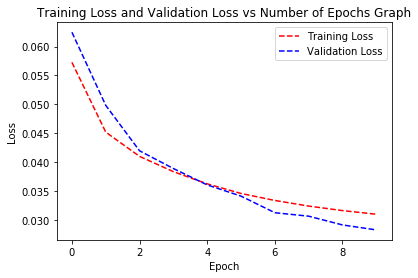

In [46]:
def lossPlot():
    trainingLoss,=plt.plot(history_AE.history['loss'],"r--")
    validationLoss,=plt.plot(history_AE.history['val_loss'],"b--")
    q=plt.legend([trainingLoss,validationLoss],["Training Loss","Validation Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss & Validation Loss vs Number of Epochs Graph")
    plt.show()
lossPlot()

In [48]:
encoder = K.function([model.layers[0].input], [model.layers[4].output])
encoded_images = encoder([x_test])[0].reshape(-1,7*7*7)
kmeans_afterencoder_AE = KMeans(n_clusters=10)
clustered_set_AE = kmeans_afterencoder_AE.fit_predict(encoded_images)
cmKMeans = confusion_matrix(y_test, clustered_set_AE)
print(cmKMeans)

[[  1 300  66  54   0   4 562   9   4   0]
 [  0  21 930  13   0   0  34   2   0   0]
 [  0 393   3 587   0   4  11   0   2   0]
 [  0 127 620  16   0   2 216  13   6   0]
 [  0 182  38 674   0   5  88   2  11   0]
 [489   4   0   0  48   0   0 436   0  23]
 [  1 454  35 325   0  16 160   6   3   0]
 [789   0   0   0 188   0   0  21   0   2]
 [ 27  61  16  57   4 382   3  51 398   1]
 [ 15   0   0   0 542   1   1  57   0 384]]


In [49]:
kmeans_afterencoder_AE.fit(encoded_images)
calculate_metrics(kmeans_afterencoder_AE, encoded_images, y_test)
cluster_labels_AE = infer_cluster_labels(kmeans_afterencoder_AE, y_test)
predicted_Y_AE = infer_data_labels(kmeans_afterencoder_AE.labels_, cluster_labels_AE)
print('Auto Encoder using K-Means clustering Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_Y_AE)))

Number of Clusters: 10
Inertia: 3926.7046618957893
Homogeneity: 0.5027222676526181
Auto Encoder using K-Means clustering Accuracy: 0.5177



In [50]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
gmm.fit(encoded_images)
labelsGMM=gmm.predict(encoded_images)

In [51]:
def infer_cluster_labels_GMM(gmm, actual_labels):
    inferred_labels = {}
    for i in range(gmm.n_components):
        labels = []
        index = np.where(labelsGMM == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels  
def infer_data_labels_GMM(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key                
    return predicted_labels

In [52]:
cluster_labels_GMM = infer_cluster_labels_GMM(gmm, y_test)
predicted_Y_GMM = infer_data_labels_GMM(labelsGMM, cluster_labels_GMM)
print('Gaussian Mixture Model Clustering Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_Y_GMM)))

GMM Clustering Accuracy: 0.5279



In [55]:
confusionmatrix_GMM = confusion_matrix(y_test, labelsGMM)
print(confusionmatrix_GMM)

[[202  48   2  80   1 592  42   3   0  30]
 [ 17   9   0  59   0   3  14   0   0 898]
 [ 37 652   1  39   0   8 258   2   0   3]
 [112  17   0 436   0  30  25   1   0 379]
 [ 28 658   1 190   0   5 107   5   0   6]
 [ 20   0  56   0 821   0   8   0  95   0]
 [147 368   3  95   1 131 243   3   0   9]
 [  0   0  78   0 919   0   0   0   3   0]
 [ 40  71 357   9  14   1  87 419   1   1]
 [  0   0 465   2  98   0   3   0 432   0]]
